In [1]:
%matplotlib inline

import numpy as np # NUMPY
import pandas as pd # PANDAS
import matplotlib.pyplot as plt # MATPLOTLIB
import seaborn as sns # SEABORN
import scipy
import sklearn
from sklearn.decomposition import PCA
import cv2
import os 
from skimage import filters
from scipy import ndimage

# Vamos a escribir un expression map, primero con us Self Organizing Map

In [64]:
b_shape = pd.read_csv('pca_shapepoints.csv',header = None)
b_structure = pd.read_csv('pca_structurepoints.csv',header = None)
b_cartoon = pd.read_csv('pca_cartoonpoints.csv',header = None)
b_texture = pd.read_csv('pca_texturepoints.csv',header = None)

In [65]:
cant_frames_per_seq = pd.read_csv('ckmock_landmark_FramePerSeq.csv',header = None)
cant_frames_per_seq = np.asarray(cant_frames_per_seq).flatten()
cant_frames_per_seq

first_frames = [0]
for i in cant_frames_per_seq:
    current = first_frames[-1] + i
    first_frames.append(current)

In [66]:
first_frames[0:9]

[0, 16, 38, 52, 73, 93, 106, 125, 141]

In [67]:
b_shape = b_shape[0:154]
b_structure = b_structure[0:154]

In [68]:
b_vector = np.concatenate((b_shape, b_structure), axis = 1)
b_vector = np.concatenate((b_vector, b_cartoon), axis = 1)
b_vector = np.concatenate((b_vector, b_texture), axis = 1)

In [69]:
 b_vector.shape

(154, 86)

In [82]:
emotion_targets = np.zeros(154, dtype=int)
emotion_targets[0] = 0
emotion_targets[1:16] = 6
emotion_targets[16] = 0
emotion_targets[17:38] = 5
emotion_targets[38] = 0
emotion_targets[39:52] = 3
emotion_targets[52] = 0
emotion_targets[53:73] = 1
emotion_targets[73] = 0
emotion_targets[74:93] = 2
emotion_targets[93] = 0
emotion_targets[94:106] = 4
emotion_targets[106] = 0
emotion_targets[107:125] = 6
emotion_targets[125] = 0
emotion_targets[126:141] = 5
emotion_targets[141] = 0
emotion_targets[142:154] = 2


In [83]:

emotion_targets = emotion_targets.reshape((154,1))

In [72]:
#b_vector = np.concatenate((b_vector, emotion_targets), axis = 1)
#b_vector.shape

(154, 86)

In [84]:
target = emotion_targets
label_names ={0: 'Neutral',1:'Anger',2:'Disgust',3:'Fear',4:'Happy',5:'Sadness',6:'Surprise'}

In [88]:
target = target.flatten()
target

array([0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [91]:
import minisom
### Initialization and training ###
som = minisom.MiniSom(7,7,86,sigma=1.0,learning_rate=0.5)
som.random_weights_init(b_vector)
print("Training...")
som.train_random(b_vector,500) # training with 100 iterations
print("\n...ready!")

Training...

...ready!


In [92]:
som.topographic_error(b_vector[:100])



0.15

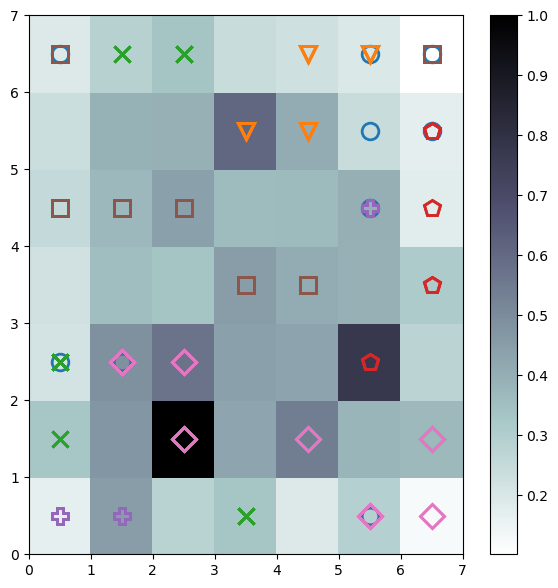

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(7, 7))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

## Plotting the response for each pattern in the iris dataset
## different colors and markers for each label
markers = ['o','v', 'x', 'p', 'P','s','D' ]
colors = ['C0', 'C1', 'C2', 'C3', 'C4','C5', 'C6']
for cnt, xx in enumerate(b_vector):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]], markersize=12, markeredgewidth=2)

plt.show()

In [ ]:
surprise
sadness
fear
anger
disgust
happiness
surprise
sadness
disgust

In [ ]:
markers = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sadness', 'Surprise'] 

In [ ]:
According to ck+

Anger = 1
Contempt = 2 (no vemos)
Disgust = 3
Fear = 4
Happy = 5
Sadness =6
Surprise =  7

In [59]:
import pandas as pd
import numpy as np
columns=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', 
                    names=columns, 
                   sep='\t+', engine='python')
target = data['target'].values
label_names = {1:'Kama', 2:'Rosa', 3:'Canadian'}
data = data[data.columns[:-1]]
# data normalization
#data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
#data = data.values

In [52]:
data.head()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coefficient,length_kernel_groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [54]:
data = data[data.columns[:-1]]
data.head()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coefficient,length_kernel_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
